In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('bigmart_train.csv')

In [4]:
df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [5]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular' }}, inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df.shape

(8523, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 666.0+ KB


In [12]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
item_wt_mean = df['Item_Weight'].mean()

df['Item_Weight'].fillna(item_wt_mean,inplace = True)
df['Item_Weight'].isnull().sum()

0

In [15]:
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type',aggfunc = (lambda x: x.mode()[0]))

In [16]:
print(outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [17]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [18]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size_mode)

In [19]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
sns.set()

<ipython-input-21-32293f1592a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


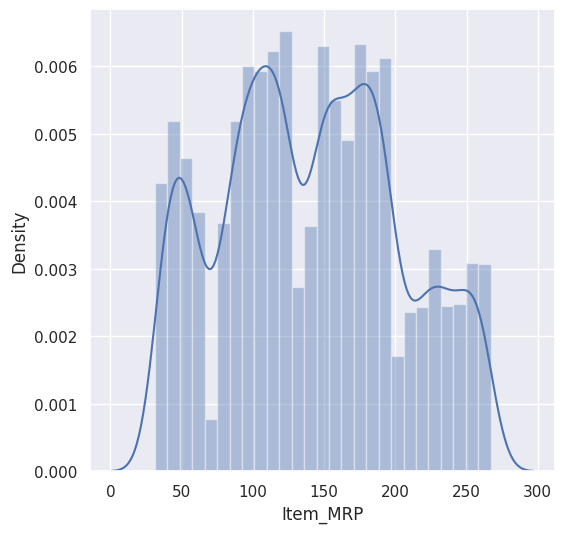

In [21]:
plt.figure(figsize = (6,6))
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-22-32293f1592a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


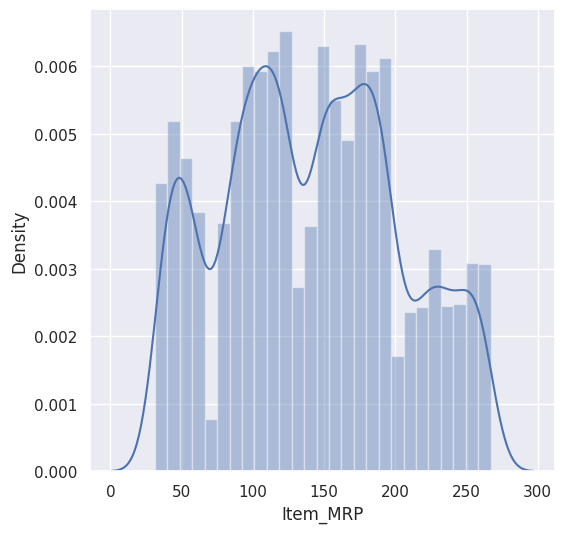

In [22]:
plt.figure(figsize = (6,6))
sns.distplot(df['Item_MRP'])
plt.show()

<ipython-input-23-768dc542804e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


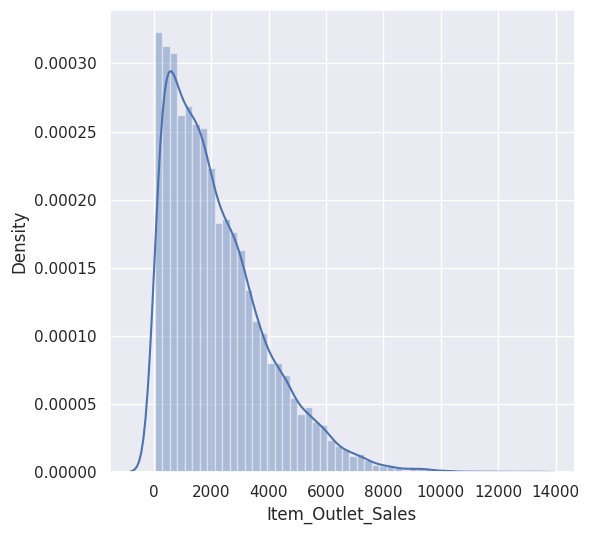

In [23]:
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

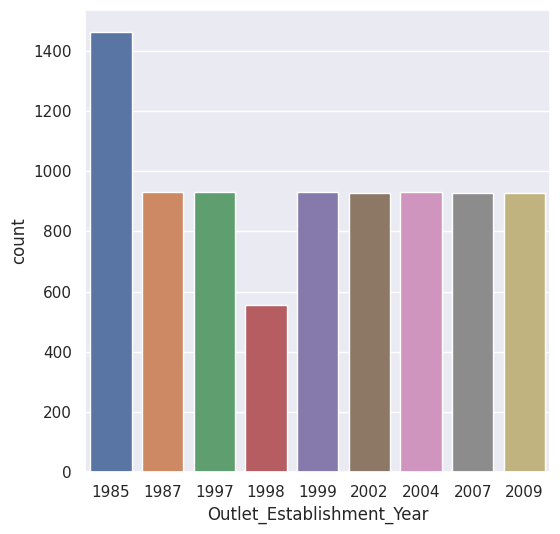

In [24]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = df)
plt.show()

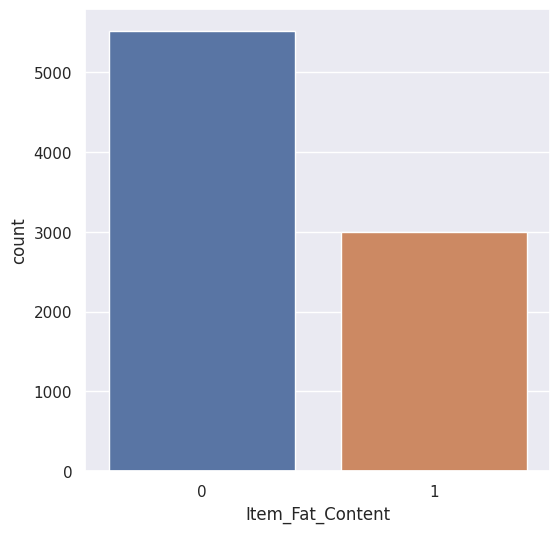

In [25]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = df)
plt.show()

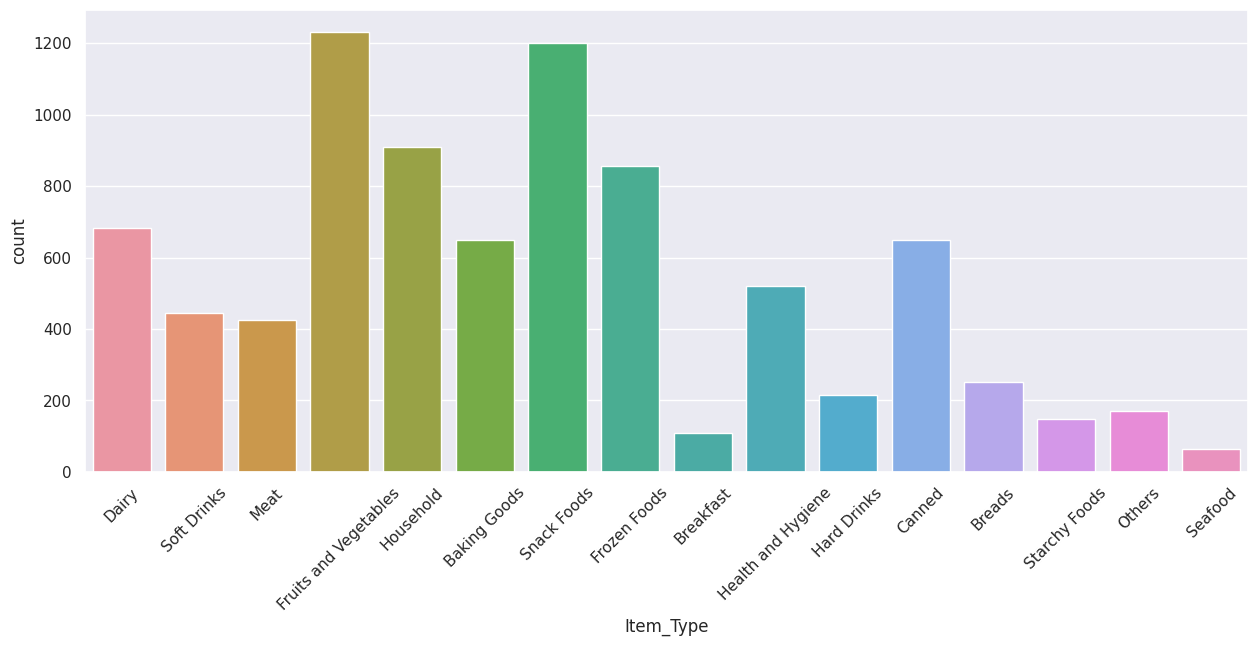

In [26]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Item_Type', data = df)
plt.xticks(rotation = 45)
plt.show()

In [27]:
"""
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', data = df)
plt.show()
"""

" \nplt.figure(figsize = (6,6))\nsns.countplot(x = 'Outlet_Size', data = df)\nplt.show() \n"

In [28]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#ohe = OneHotEncoder()
#X = ohe.fit_transform(X).toarray()

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [30]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [21])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [32]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
print(X[0])

[1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 9.3 0 0.016047301 249.8092 1999]


In [34]:
print(y)

[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ]


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train[0])

[-0.62042557 -0.69694099  1.23725875 -0.37536239 -1.3833565   2.83803609
 -0.35024867 -0.35628942  1.42817331 -0.62065229 -0.62405421 -0.28010031
 -0.1778301  -0.11168712 -0.28943128 -0.29180542 -0.33528552 -0.40849276
 -0.15991123 -0.25327571  2.86158684 -0.22803103 -0.14212849 -0.08681345
 -0.41044628 -0.23471537 -0.13270999  1.17945559 -0.74036346  0.44855653
  0.81315539  1.3320699 ]


In [38]:
print(X_test[0])

[-0.62042557  1.43484172 -0.80823838 -0.37536239  0.72287946 -0.35235634
 -0.35024867 -0.35628942 -0.70019513 -0.62065229  1.6024249  -0.28010031
 -0.1778301  -0.11168712 -0.28943128 -0.29180542 -0.33528552 -0.40849276
 -0.15991123  3.94826643 -0.34945646 -0.22803103 -0.14212849 -0.08681345
 -0.41044628 -0.23471537 -0.13270999  0.13711443 -0.74036346 -0.21671353
 -1.68705316  0.49724569]


In [40]:
regressor = XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
train_pred = regressor.predict(X_train)

In [45]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train, train_pred)

In [46]:
print('R Squared value = ', r2_train)

R Squared value =  0.8606743791202769


In [47]:
test_pred = regressor.predict(X_test)

In [48]:
r2_test = metrics.r2_score(y_test, test_pred)

In [49]:
print('R Squared value = ', r2_test)

R Squared value =  0.5057253692974693
